In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Define the font properties (assuming the path to FreeSans)
font_path = '/usr/share/fonts/truetype/freefont/FreeSans.ttf'  # Update the path as per your system
prop = fm.FontProperties(fname=font_path)

def plot_bar_chart(values_tuple, colors_tuple, labels, title="Sample Bar Plot", xlabel="Categories", ylabel_tuple=['Unseen Grasps Accuracy', 'Unseen Tools Accuracy'], rand_guess_tuple=0.1, save_name = ''):
    font_size = 30
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    for ax, values_list, colors_list, ylabel, rand_guess in zip([ax1, ax2], values_tuple, colors_tuple, ylabel_tuple, rand_guess_tuple):
        # Concatenate values and colors
        values = np.concatenate(values_list)
        colors = np.concatenate(colors_list)

        # Generate positions for the bars
        positions_list = []
        current_position = 0.5
        for values_set in values_list:
            positions = current_position + np.arange(len(values_set)) * 0.9
            positions_list.append(positions)
            current_position = positions[-1] + 2.0
        
        positions = np.concatenate(positions_list)        

        # Adjust the bar width to make bars narrower
        bar_width = 0.8

        if values_list:
            for i in range(len(values_list)):
                if i % 2 == 0:  # Apply shading alternatively
                    start = positions_list[i][0] - bar_width / 2 - 0.55
                    end = positions_list[i][-1] + bar_width / 2 + 0.55
                    ax.axvspan(start, end, color='lightblue', alpha=0.3)


        # Customize the bar plot with individual colors for each bar and no edge color
        bars = ax.bar(positions, values, color=colors, width=bar_width, align='center')

        # ax.set_xlabel(xlabel, fontsize=14, fontproperties=prop)
        ax.set_ylabel(ylabel, fontsize=font_size, fontproperties=prop)
        ax.set_xticks([])
        
        # Set axis limits
        ax.set_ylim(0, 100)  # Set y-axis limits from 0 to 100
        ax.set_xlim(0, positions[-1] + 0.5)  # Set x-axis limits to fit the bars

        # Customize horizontal grid lines for a professional look
        ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.6, color='grey', alpha=0.6)  # Major horizontal grid lines
        ax.yaxis.grid(True, which='minor', linestyle=':', linewidth=0.4, color='lightgrey', alpha=0.8)  # Minor horizontal grid lines
        ax.minorticks_on()  # Enable minor ticks
        ax.xaxis.grid(False)  # Disable vertical grid lines

        # Add x-axis and y-axis lines
        ax.axhline(y=0.1, color='black', linewidth=1)  # X-axis line
        ax.axvline(x=0, color='black', linewidth=1)  # Y-axis line
        ax.axhline(y=rand_guess, color='black', linewidth=1, linestyle='-.')  # X-axis line

        # Customize the y-axis ticks
        ax.tick_params(axis='y', labelsize=16)

        # Remove the spines (the box around the plot) for a cleaner look
        for spine in ax.spines.values():
            spine.set_visible(False)

    # Show plot
    # Add title and labels with custom font
    # start = 0.105
    # space = 0.113
    # height = 0.01
    # fig.text(x=start, y=height, s='Soft Bubbles', transform=fig.transFigure, fontsize=16, fontproperties=prop, ha='center')
    # fig.text(x=start + space, y=height, s='GelSlims', transform=fig.transFigure, fontsize=16, fontproperties=prop, ha='center')
    # fig.text(x=start + 2*space, y=height, s='GelSlims', transform=fig.transFigure, fontsize=16, fontproperties=prop, ha='center')
    # fig.text(x=start + 3*space, y=height, s='Soft Bubbles', transform=fig.transFigure, fontsize=16, fontproperties=prop, ha='center')

    # start = 0.6
    # space = 0.113
    # height = 0.01
    # fig.text(x=start, y=height, s='Soft Bubbles', transform=fig.transFigure, fontsize=16, fontproperties=prop, ha='center')
    # fig.text(x=start + space, y=height, s='GelSlims', transform=fig.transFigure, fontsize=16, fontproperties=prop, ha='center')
    # fig.text(x=start + 2*space, y=height, s='GelSlims', transform=fig.transFigure, fontsize=16, fontproperties=prop, ha='center')
    # fig.text(x=start + 3*space, y=height, s='Soft Bubbles', transform=fig.transFigure, fontsize=16, fontproperties=prop, ha='center')

    start = 0.165
    space = 0.221
    height = -0.02
    fig.text(x=start, y=height, s='Generalization', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
    fig.text(x=start, y=height-0.08, s='within Sensor', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
    fig.text(x=start + space, y=height, s='Generalization', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
    fig.text(x=start + space, y=height-0.08, s='across Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')

    start = 0.661
    space = 0.221
    height = -0.02
    fig.text(x=start, y=height, s='Generalization', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
    fig.text(x=start, y=height-0.08, s='within Sensor', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
    fig.text(x=start + space, y=height, s='Generalization', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
    fig.text(x=start + space, y=height-0.08, s='across Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')

    fig.legend(bars, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(labels), fontsize=font_size*(2/3))
    fig.patch.set_facecolor('white')
    plt.tight_layout()
        
    save_path = '/home/samanta/CMTJE/results'
    if not os.path.exists(save_path):
        os.makedirs(save_path)
        
    save_path = os.path.join(save_path, save_name + '.pdf')
    plt.savefig(save_path, format='pdf', dpi=300, bbox_inches='tight')

    plt.show()

    return

## Pretraining Step

### Classification Accuracy

#### Model vs Baselines

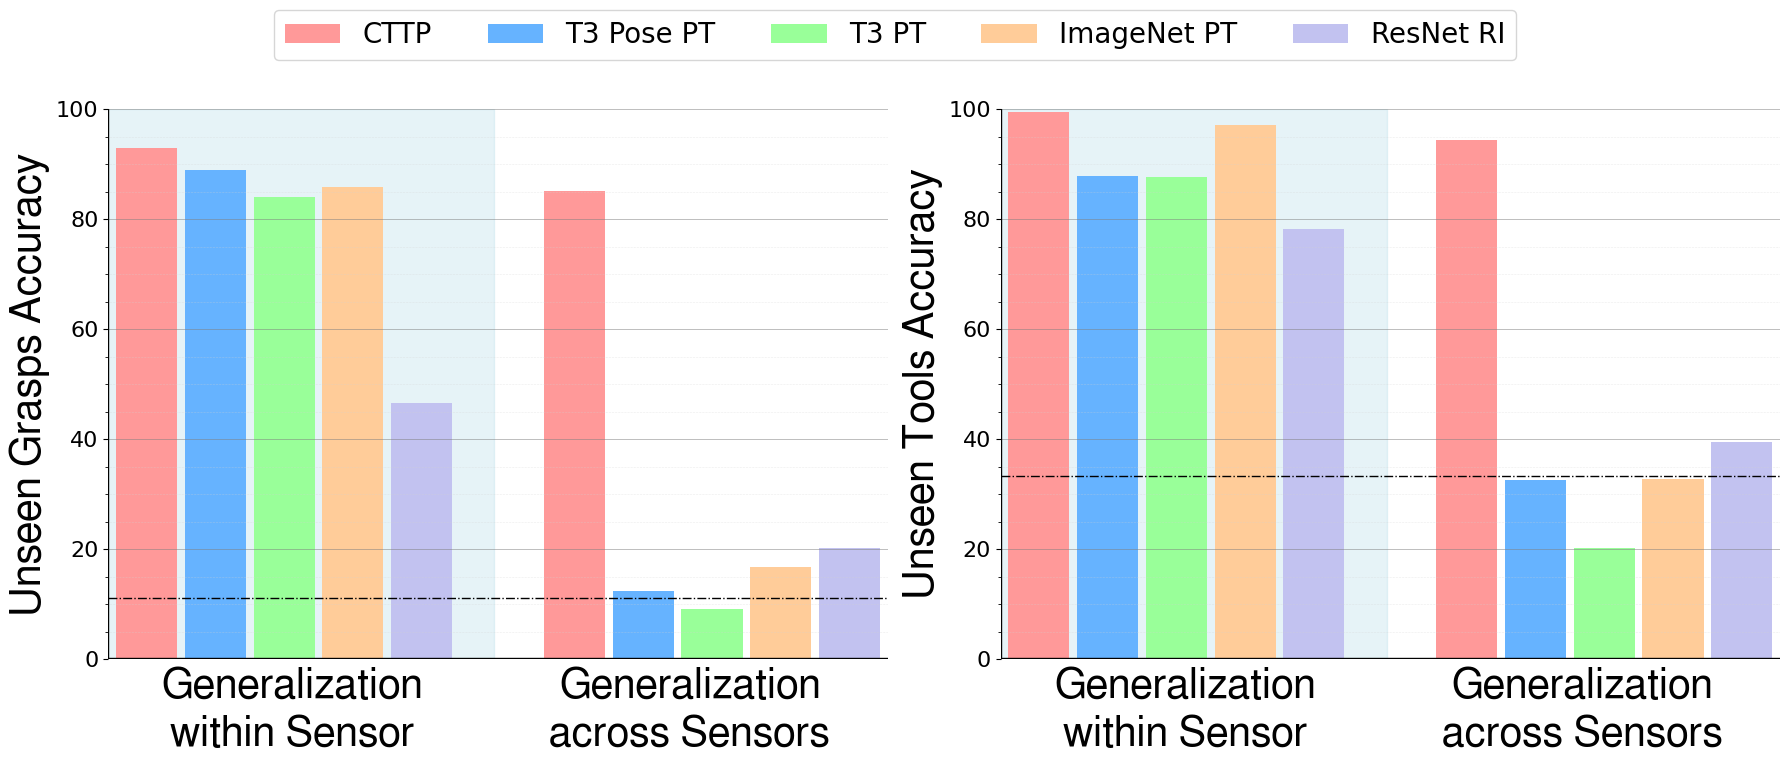

In [3]:
results_path_1 = '/home/samanta/CMTJE/checkpoints/tactile/simclr_ALL/dataset_1_run_B_128'
results_path_2 = '/home/samanta/CMTJE/checkpoints/tactile/T3/pretrain2_pose_small_I30200'
results_path_3 = '/home/samanta/CMTJE/checkpoints/tactile/T3/pretrain1_small_I30200'
results_path_4 = '/home/samanta/CMTJE/checkpoints/tactile/simclr_ALL/pretrained'
results_path_5 = '/home/samanta/CMTJE/checkpoints/tactile/simclr_ALL/random_init'

paths = [results_path_1, results_path_2, results_path_3, results_path_4, results_path_5]
model_names = ['CTTP', 'T3 Pose PT', 'T3 PT', 'ImageNet PT', 'ResNet RI']

# Unseen grasps accuracies
bubbles_on_bubbles_accs = []
bubbles_on_gelslims_accs = []
gelslims_on_gelslims_accs = []
gelslims_on_bubbles_accs = []

for path in paths:
    df = pd.read_csv(path + '/training_bubbles_tools_classification_results.csv')
    bubbles_on_bubbles_accs.append(df['Test Bubbles Accuracy'].values[-1])
    bubbles_on_gelslims_accs.append(df['Test Gelslim Accuracy'].values[-1])
    df = pd.read_csv(path + '/training_gelslims_tools_classification_results.csv')
    gelslims_on_gelslims_accs.append(df['Test Bubbles Accuracy'].values[-1])
    gelslims_on_bubbles_accs.append(df['Test Gelslim Accuracy'].values[-1])

bubbles_on_bubbles_accs = np.array(bubbles_on_bubbles_accs) * 100
bubbles_on_gelslims_accs = np.array(bubbles_on_gelslims_accs) * 100
gelslims_on_gelslims_accs = np.array(gelslims_on_gelslims_accs) * 100
gelslims_on_bubbles_accs = np.array(gelslims_on_bubbles_accs) * 100

# values_ug = [bubbles_on_bubbles_accs, bubbles_on_gelslims_accs, gelslims_on_gelslims_accs, gelslims_on_bubbles_accs]
cross_sensor_accs = (bubbles_on_gelslims_accs + gelslims_on_bubbles_accs)/2
within_sensor_accs = (bubbles_on_bubbles_accs + gelslims_on_gelslims_accs)/2
values_ug = [within_sensor_accs, cross_sensor_accs]
colors_0 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
colors_ug = [colors_0, colors_0]

# Unseen tools accuracies
bubbles_on_bubbles_accs = []
bubbles_on_gelslims_accs = []
gelslims_on_gelslims_accs = []
gelslims_on_bubbles_accs = []

for path in paths:
    df = pd.read_csv(path + '/testing_bubbles_tools_classification_results.csv')
    bubbles_on_bubbles_accs.append(df['Test Bubbles Accuracy'].values[-1])
    bubbles_on_gelslims_accs.append(df['Test Gelslim Accuracy'].values[-1])
    df = pd.read_csv(path + '/testing_gelslims_tools_classification_results.csv')
    gelslims_on_gelslims_accs.append(df['Test Bubbles Accuracy'].values[-1])
    gelslims_on_bubbles_accs.append(df['Test Gelslim Accuracy'].values[-1])

bubbles_on_bubbles_accs = np.array(bubbles_on_bubbles_accs) * 100
bubbles_on_gelslims_accs = np.array(bubbles_on_gelslims_accs) * 100
gelslims_on_gelslims_accs = np.array(gelslims_on_gelslims_accs) * 100
gelslims_on_bubbles_accs = np.array(gelslims_on_bubbles_accs) * 100

# values_ut = [bubbles_on_bubbles_accs, bubbles_on_gelslims_accs, gelslims_on_gelslims_accs, gelslims_on_bubbles_accs]
cross_sensor_accs = (bubbles_on_gelslims_accs + gelslims_on_bubbles_accs)/2
within_sensor_accs = (bubbles_on_bubbles_accs + gelslims_on_gelslims_accs)/2
values_ut = [within_sensor_accs, cross_sensor_accs]
colors_0 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
colors_ut = [colors_0, colors_0]

values = [values_ug, values_ut]
colors = [colors_ug, colors_ut]
# Bar plot of accuracies
plot_bar_chart(values, colors, model_names, title='Classification accuracies', ylabel_tuple=['Unseen Grasps Accuracy', 'Unseen Tools Accuracy'], rand_guess_tuple=[11.11, 33.33], save_name = 'models_classification_accuracies')

#### Batch Size

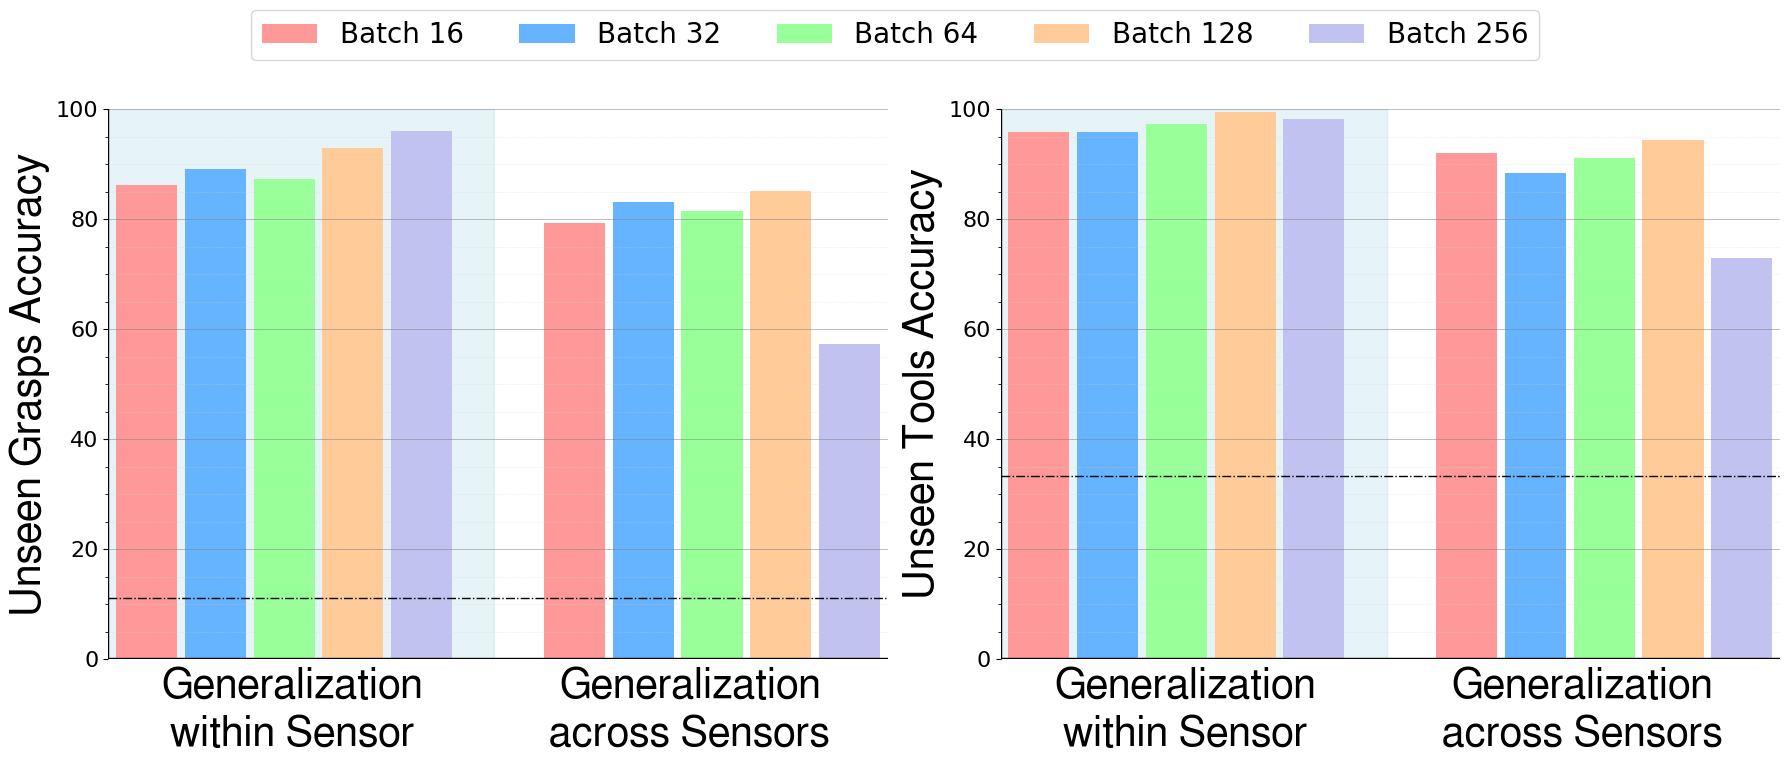

In [4]:
results_path_1 = '/home/samanta/CMTJE/checkpoints/tactile/simclr/dataset_1_run_B_16'
results_path_2 = '/home/samanta/CMTJE/checkpoints/tactile/simclr/dataset_1_run_B_32'
results_path_3 = '/home/samanta/CMTJE/checkpoints/tactile/simclr/dataset_1_run_B_64'
results_path_4 = '/home/samanta/CMTJE/checkpoints/tactile/simclr_ALL/dataset_1_run_B_128'
results_path_5 = '/home/samanta/CMTJE/checkpoints/tactile/simclr/dataset_1_run_B_256'

paths = [results_path_1, results_path_2, results_path_3, results_path_4, results_path_5]
model_names = ['Batch 16', 'Batch 32', 'Batch 64', 'Batch 128', 'Batch 256']

# Unseen grasps accuracies
bubbles_on_bubbles_accs = []
bubbles_on_gelslims_accs = []
gelslims_on_gelslims_accs = []
gelslims_on_bubbles_accs = []

for path in paths:
    df = pd.read_csv(path + '/training_bubbles_tools_classification_results.csv')
    bubbles_on_bubbles_accs.append(df['Test Bubbles Accuracy'].values[-1])
    bubbles_on_gelslims_accs.append(df['Test Gelslim Accuracy'].values[-1])
    df = pd.read_csv(path + '/training_gelslims_tools_classification_results.csv')
    gelslims_on_gelslims_accs.append(df['Test Bubbles Accuracy'].values[-1])
    gelslims_on_bubbles_accs.append(df['Test Gelslim Accuracy'].values[-1])

bubbles_on_bubbles_accs = np.array(bubbles_on_bubbles_accs) * 100
bubbles_on_gelslims_accs = np.array(bubbles_on_gelslims_accs) * 100
gelslims_on_gelslims_accs = np.array(gelslims_on_gelslims_accs) * 100
gelslims_on_bubbles_accs = np.array(gelslims_on_bubbles_accs) * 100

# values_ug = [bubbles_on_bubbles_accs, bubbles_on_gelslims_accs, gelslims_on_gelslims_accs, gelslims_on_bubbles_accs]
cross_sensor_accs = (bubbles_on_gelslims_accs + gelslims_on_bubbles_accs)/2
within_sensor_accs = (bubbles_on_bubbles_accs + gelslims_on_gelslims_accs)/2
values_ug = [within_sensor_accs, cross_sensor_accs]
colors_0 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
colors_ug = [colors_0, colors_0]

# Unseen tools accuracies
bubbles_on_bubbles_accs = []
bubbles_on_gelslims_accs = []
gelslims_on_gelslims_accs = []
gelslims_on_bubbles_accs = []

for path in paths:
    df = pd.read_csv(path + '/testing_bubbles_tools_classification_results.csv')
    bubbles_on_bubbles_accs.append(df['Test Bubbles Accuracy'].values[-1])
    bubbles_on_gelslims_accs.append(df['Test Gelslim Accuracy'].values[-1])
    df = pd.read_csv(path + '/testing_gelslims_tools_classification_results.csv')
    gelslims_on_gelslims_accs.append(df['Test Bubbles Accuracy'].values[-1])
    gelslims_on_bubbles_accs.append(df['Test Gelslim Accuracy'].values[-1])

bubbles_on_bubbles_accs = np.array(bubbles_on_bubbles_accs) * 100
bubbles_on_gelslims_accs = np.array(bubbles_on_gelslims_accs) * 100
gelslims_on_gelslims_accs = np.array(gelslims_on_gelslims_accs) * 100
gelslims_on_bubbles_accs = np.array(gelslims_on_bubbles_accs) * 100

# values_ut = [bubbles_on_bubbles_accs, bubbles_on_gelslims_accs, gelslims_on_gelslims_accs, gelslims_on_bubbles_accs]
cross_sensor_accs = (bubbles_on_gelslims_accs + gelslims_on_bubbles_accs)/2
within_sensor_accs = (bubbles_on_bubbles_accs + gelslims_on_gelslims_accs)/2
values_ut = [within_sensor_accs, cross_sensor_accs]
colors_0 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
colors_ut = [colors_0, colors_0]

values = [values_ug, values_ut]
colors = [colors_ug, colors_ut]
# Bar plot of accuracies
plot_bar_chart(values, colors, model_names, title='Classification accuracies', ylabel_tuple=['Unseen Grasps Accuracy', 'Unseen Tools Accuracy'], rand_guess_tuple=[11.11, 33.33], save_name = 'batches_classification_accuracies')

## TSNE

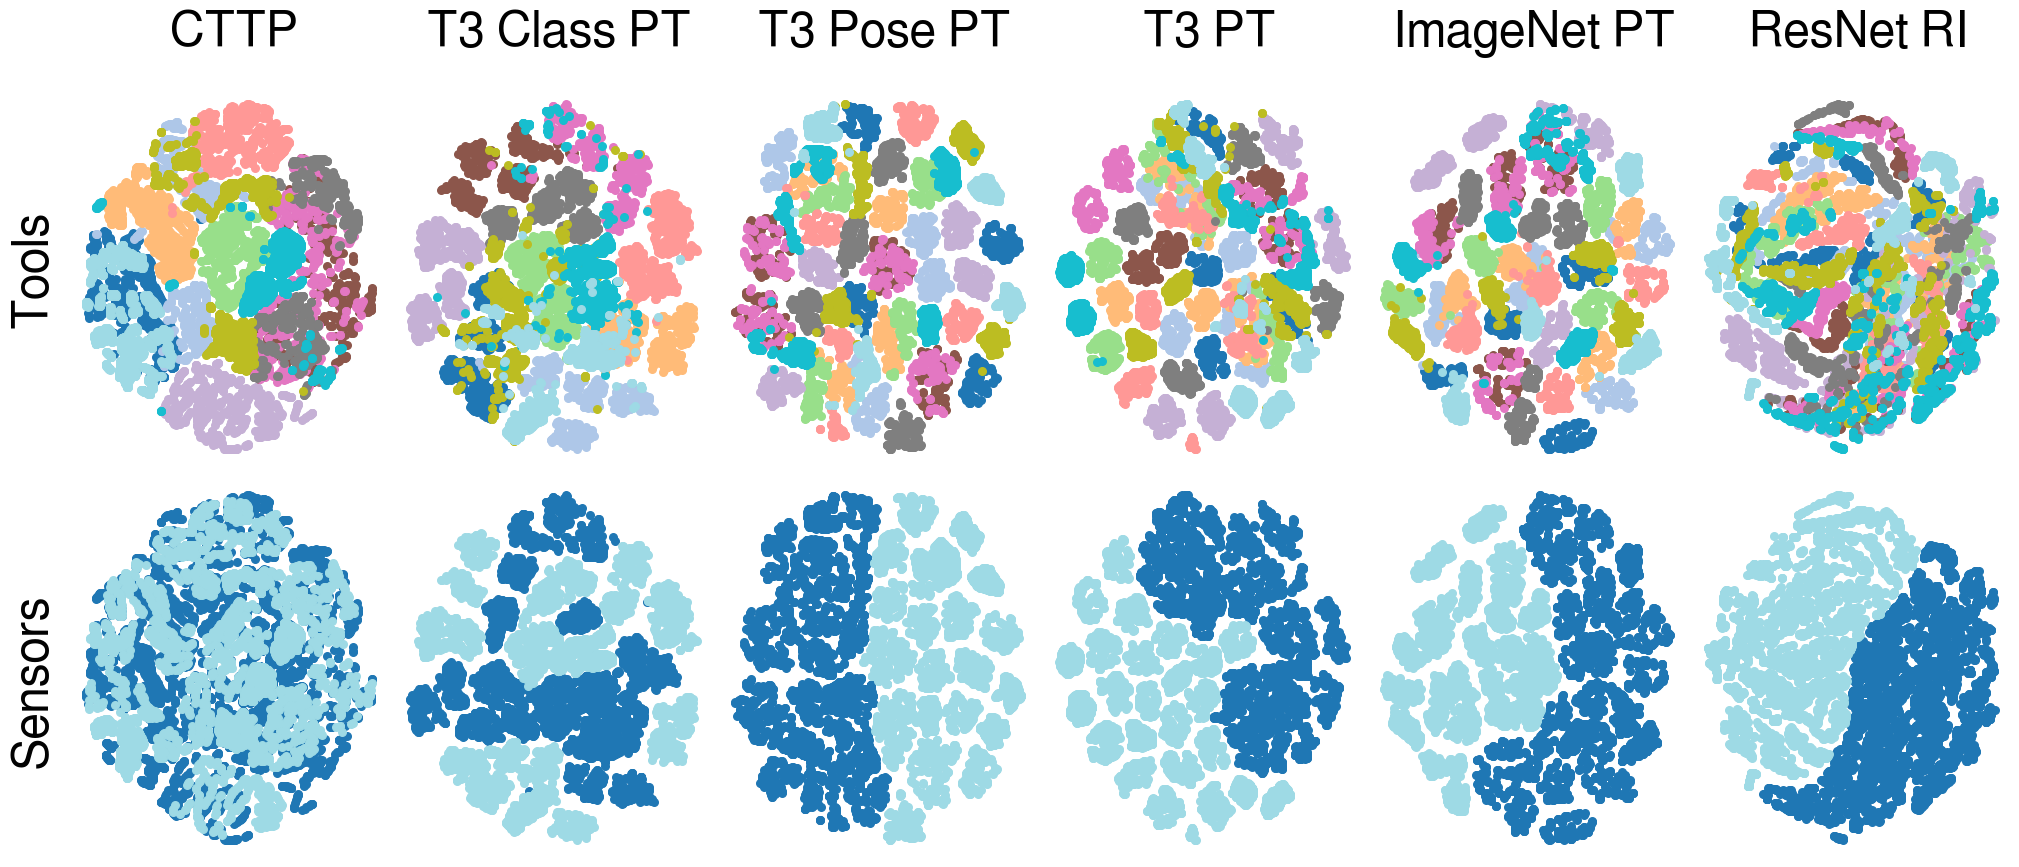

In [5]:
from joint_embedding_learning.utils.analysis_tools import load_embeddings, apply_tsne, plot_tsne

def tsne_results(axs, results_path):
    ax1, ax2 = axs
    tsne_unseen_grasps_X_bubbles, unseen_grasps_tool, unseen_grasps_sensor_bubbles = load_embeddings(results_path, dataset='tactile', split_='tsne_unseen_grasps', sensor='bubbles')
    tsne_unseen_grasps_X_gelslim, _, unseen_grasps_sensor_gelslims = load_embeddings(results_path, dataset='tactile', split_='tsne_unseen_grasps', sensor='gelslim')
    tsne_unseen_tools_X_bubbles, unseen_tools_tool, unseen_tools_sensor_bubbles= load_embeddings(results_path, dataset='tactile', split_='tsne_unseen_tools', sensor='bubbles')
    tsne_unseen_tools_X_gelslim, _, unseen_tools_sensor_gelslims = load_embeddings(results_path, dataset='tactile', split_='tsne_unseen_tools', sensor='gelslim')

    unseen_grasps_tool = np.concatenate([unseen_grasps_tool, unseen_grasps_tool])
    unseen_grasps_sensor = np.concatenate([unseen_grasps_sensor_bubbles, unseen_grasps_sensor_gelslims])
    unseen_tools_tool = np.concatenate([unseen_tools_tool, unseen_tools_tool])
    unseen_tools_sensor = np.concatenate([unseen_tools_sensor_bubbles, unseen_tools_sensor_gelslims])

    # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 18))
    plot_tsne(ax1, np.concatenate((tsne_unseen_grasps_X_bubbles, tsne_unseen_grasps_X_gelslim, tsne_unseen_tools_X_bubbles, tsne_unseen_tools_X_gelslim), axis=0), np.concatenate((unseen_grasps_tool, unseen_tools_tool + 9)))
    plot_tsne(ax2, np.concatenate((tsne_unseen_grasps_X_bubbles, tsne_unseen_grasps_X_gelslim, tsne_unseen_tools_X_bubbles, tsne_unseen_tools_X_gelslim), axis=0), np.concatenate((unseen_grasps_sensor, unseen_tools_sensor)))
    
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])

    for spine in ax1.spines.values():
            spine.set_visible(False)
    for spine in ax2.spines.values():
            spine.set_visible(False)
    return

results_path_1 = '/home/samanta/CMTJE/checkpoints/tactile/simclr_ALL/dataset_1_run_B_128'
results_path_2 = '/home/samanta/CMTJE/checkpoints/tactile/T3/pretrain2_class_small_I30200'
results_path_3 = '/home/samanta/CMTJE/checkpoints/tactile/T3/pretrain2_pose_small_I30200'
results_path_4 = '/home/samanta/CMTJE/checkpoints/tactile/T3/pretrain1_small_I30200'
results_path_5 = '/home/samanta/CMTJE/checkpoints/tactile/simclr_ALL/pretrained'
results_path_6 = '/home/samanta/CMTJE/checkpoints/tactile/simclr_ALL/random_init'

result_paths = [results_path_1, results_path_2, results_path_3, results_path_4, results_path_5, results_path_6]
models = ['CTTP', 'T3 Class PT', 'T3 Pose PT', 'T3 PT', 'ImageNet PT', 'ResNet RI']

# paths = [results_path_1, results_path_2]
# model_names = ['CTTP', 'T3 PT Pose PT']

fig, ((ax1, ax2, ax3, ax4, ax5, ax6), (ax7, ax8, ax9, ax10, ax11, ax12)) = plt.subplots(2, 6, figsize=(25, 10))
space = 0.03
plt.subplots_adjust(wspace=space, hspace=space)
tsne_results((ax1, ax7), results_path_1)
tsne_results((ax2, ax8), results_path_2)
tsne_results((ax3, ax9), results_path_3)
tsne_results((ax4, ax10), results_path_4)
tsne_results((ax5, ax11), results_path_5)
tsne_results((ax6, ax12), results_path_6)

# fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, figsize=(50, 6))
# space = 0.03
# plt.subplots_adjust(wspace=space, hspace=space)
# tsne_results((ax1, ax2), results_path_1)
# tsne_results((ax3, ax4), results_path_2)
# tsne_results((ax5, ax6), results_path_3)
# tsne_results((ax7, ax8), results_path_4)
# tsne_results((ax9, ax10), results_path_5)


# start = 0.16
# space = 0.078
# height = -0.003
# fig.text(x=start, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
# fig.text(x=start + space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
# fig.text(x=start + 2*space, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
# fig.text(x=start + 3*space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
# fig.text(x=start + 4*space, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
# fig.text(x=start + 5*space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
# fig.text(x=start + 6*space, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
# fig.text(x=start + 7*space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
# fig.text(x=start + 8*space, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
# fig.text(x=start + 9*space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')

font_path = '/usr/share/fonts/truetype/freefont/FreeSans.ttf'  # Update the path as per your system
prop = fm.FontProperties(fname=font_path)
font_size = 35
start = 0.19
space = 0.130
height = 0.92
fig.text(x=start, y=height, s=models[0], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + space, y=height, s=models[1], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 2*space, y=height, s=models[2], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 3*space, y=height, s=models[3], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 4*space, y=height, s=models[4], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 5*space, y=height, s=models[5], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')

fig.text(x=0.11, y=0.65, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center', rotation = 90)
fig.text(x=0.11, y=0.21, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center', rotation = 90)

save_path = '/home/samanta/CMTJE/results'
if not os.path.exists(save_path):
        os.makedirs(save_path)
save_name = 'tsne_results'
save_path = os.path.join(save_path, save_name + '.png')
fig.savefig(save_path, format='png', dpi=100, bbox_inches='tight')


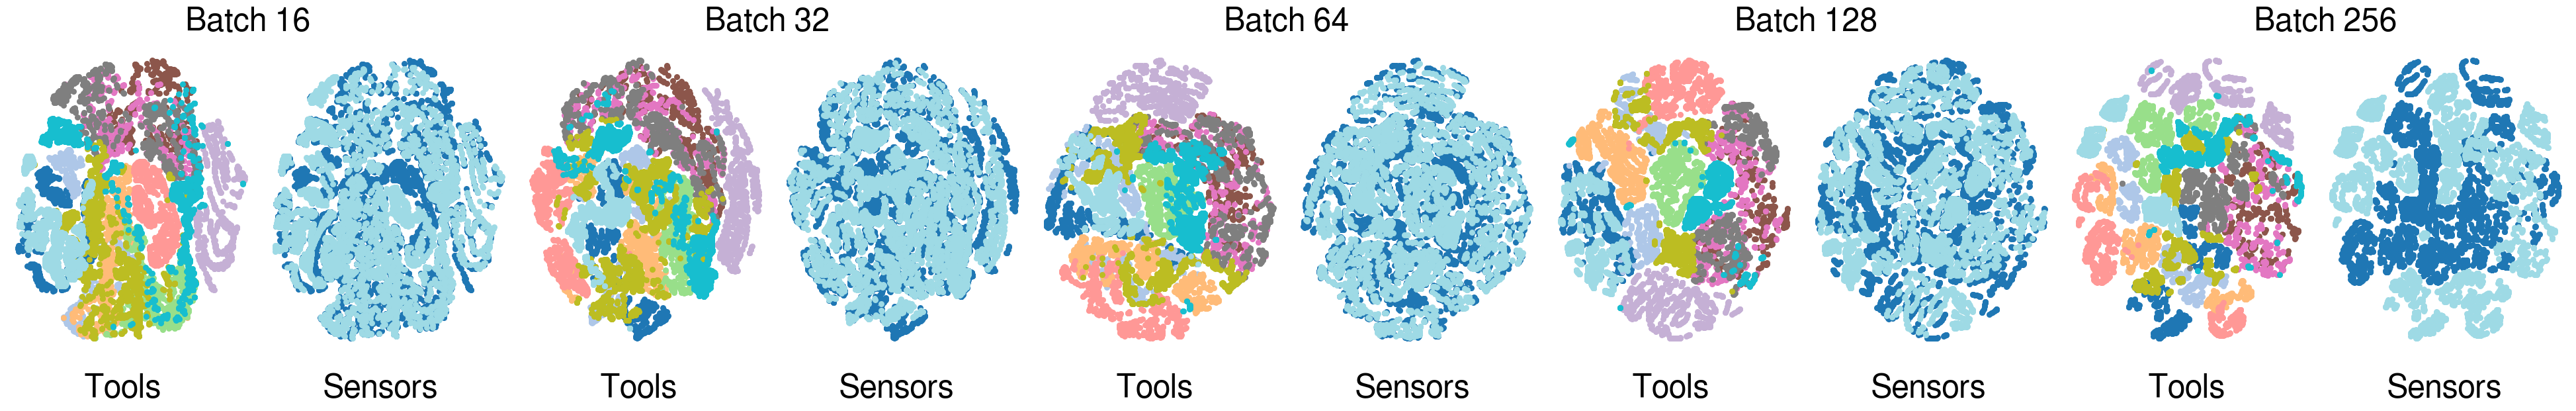

In [6]:
from joint_embedding_learning.utils.analysis_tools import load_embeddings, apply_tsne, plot_tsne

def tsne_results(axs, results_path):
    ax1, ax2 = axs
    tsne_unseen_grasps_X_bubbles, unseen_grasps_tool, unseen_grasps_sensor_bubbles = load_embeddings(results_path, dataset='tactile', split_='tsne_unseen_grasps', sensor='bubbles')
    tsne_unseen_grasps_X_gelslim, _, unseen_grasps_sensor_gelslims = load_embeddings(results_path, dataset='tactile', split_='tsne_unseen_grasps', sensor='gelslim')
    tsne_unseen_tools_X_bubbles, unseen_tools_tool, unseen_tools_sensor_bubbles= load_embeddings(results_path, dataset='tactile', split_='tsne_unseen_tools', sensor='bubbles')
    tsne_unseen_tools_X_gelslim, _, unseen_tools_sensor_gelslims = load_embeddings(results_path, dataset='tactile', split_='tsne_unseen_tools', sensor='gelslim')

    unseen_grasps_tool = np.concatenate([unseen_grasps_tool, unseen_grasps_tool])
    unseen_grasps_sensor = np.concatenate([unseen_grasps_sensor_bubbles, unseen_grasps_sensor_gelslims])
    unseen_tools_tool = np.concatenate([unseen_tools_tool, unseen_tools_tool])
    unseen_tools_sensor = np.concatenate([unseen_tools_sensor_bubbles, unseen_tools_sensor_gelslims])

    # fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 18))
    plot_tsne(ax1, np.concatenate((tsne_unseen_grasps_X_bubbles, tsne_unseen_grasps_X_gelslim, tsne_unseen_tools_X_bubbles, tsne_unseen_tools_X_gelslim), axis=0), np.concatenate((unseen_grasps_tool, unseen_tools_tool + 9)))
    plot_tsne(ax2, np.concatenate((tsne_unseen_grasps_X_bubbles, tsne_unseen_grasps_X_gelslim, tsne_unseen_tools_X_bubbles, tsne_unseen_tools_X_gelslim), axis=0), np.concatenate((unseen_grasps_sensor, unseen_tools_sensor)))
    
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax2.set_xticks([])
    ax2.set_yticks([])

    for spine in ax1.spines.values():
            spine.set_visible(False)
    for spine in ax2.spines.values():
            spine.set_visible(False)
    return

results_path_1 = '/home/samanta/CMTJE/checkpoints/tactile/simclr/dataset_1_run_B_16'
results_path_2 = '/home/samanta/CMTJE/checkpoints/tactile/simclr/dataset_1_run_B_32'
results_path_3 = '/home/samanta/CMTJE/checkpoints/tactile/simclr/dataset_1_run_B_64'
results_path_4 = '/home/samanta/CMTJE/checkpoints/tactile/simclr_ALL/dataset_1_run_B_128'
results_path_5 = '/home/samanta/CMTJE/checkpoints/tactile/simclr/dataset_1_run_B_256'

paths = [results_path_1, results_path_2, results_path_3, results_path_4, results_path_5]
models = ['Batch 16', 'Batch 32', 'Batch 64', 'Batch 128', 'Batch 256']


fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(1, 10, figsize=(50, 6))
space = 0.03
plt.subplots_adjust(wspace=space, hspace=space)
tsne_results((ax1, ax2), results_path_1)
tsne_results((ax3, ax4), results_path_2)
tsne_results((ax5, ax6), results_path_3)
tsne_results((ax7, ax8), results_path_4)
tsne_results((ax9, ax10), results_path_5)

font_size = 35
start = 0.198
space = 0.157
height = 0.92
fig.text(x=start, y=height, s=models[0], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + space, y=height, s=models[1], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 2*space, y=height, s=models[2], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 3*space, y=height, s=models[3], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 4*space, y=height, s=models[4], transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')

font_path = '/usr/share/fonts/truetype/freefont/FreeSans.ttf'  # Update the path as per your system
prop = fm.FontProperties(fname=font_path)
start = 0.16
space = 0.078
height = -0.003
fig.text(x=start, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 2*space, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 3*space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 4*space, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 5*space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 6*space, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 7*space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 8*space, y=height, s='Tools', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')
fig.text(x=start + 9*space, y=height, s='Sensors', transform=fig.transFigure, fontsize=font_size, fontproperties=prop, ha='center')


save_path = '/home/samanta/CMTJE/results'
if not os.path.exists(save_path):
        os.makedirs(save_path)
save_name = 'batch_tsne_results'
save_path = os.path.join(save_path, save_name + '.png')
fig.savefig(save_path, format='png', dpi=100, bbox_inches='tight')
